In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammedfarag22","key":"a8f48dff9b91ccb9197fe2952e8618b0"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                       title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023              Global Country Information Dataset 2023           23KB  2023-07-08 20:37:33           8287        316  1.0              
juhibhojani/house-price                                   House Price                                        7MB  2023-08-02 16:51:21            800         32  0.9411765        
arnavsmayan/netflix-userbase-dataset                      Netflix Userbase Dataset                          25KB  2023-07-04 07:38:41           9803        180  1.0              
alphiree/cardiovascular-diseases-risk-prediction-dataset  Cardiovascular Diseases Risk Prediction Dataset

In [ ]:
!kaggle datasets download -d forderation/breakhis-400x

100% 801M/803M [00:31<00:00, 26.9MB/s]
100% 803M/803M [00:31<00:00, 26.7MB/s]


In [ ]:
!unzip /content/breakhis-400x.zip -d /content/drive/MyDrive/breastData

Archive:  /content/breakhis-400x.zip
  inflating: /content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-001.png  
  inflating: /content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-003.png  
  inflating: /content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-004.png  
  inflating: /content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-005.png  
  inflating: /content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-007.png  
  inflating: /content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-011.png  
  inflating: /content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-015.png  
  inflating: /content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-019.png  
  inflating: /content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-025.png  
  inflati

In [10]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
import tensorflow
from tensorflow.keras.applications import resnet
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications import DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools

In [11]:

for dirname, _, filenames in os.walk('/content/drive/MyDrive/breastData'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)

            img = cv2.resize(img, (RESIZE,RESIZE))

            IMG.append(np.array(img))
    return IMG

/content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-003.png
/content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-004.png
/content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-001.png
/content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-011.png
/content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-015.png
/content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-005.png
/content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-007.png
/content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-019.png
/content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-025.png
/content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_F-14-14134-400-024.png
/content/drive/MyDrive/breastData/BreaKHis 400X/test/benign/SOB_B_A-14-22549G-400-007.png
/c

In [ ]:
# Y_train.shape

(1148, 2)

In [12]:
benign_train = np.array(Dataset_loader('/content/drive/MyDrive/breastData/BreaKHis 400X/train/benign',224))
malign_train = np.array(Dataset_loader('/content/drive/MyDrive/breastData/BreaKHis 400X/train/malignant',224))
benign_test = np.array(Dataset_loader('/content/drive/MyDrive/breastData/BreaKHis 400X/test/benign',224))
malign_test = np.array(Dataset_loader('/content/drive/MyDrive/breastData/BreaKHis 400X/test/malignant',224))
benign_train_label = np.zeros(len(benign_train))
malign_train_label = np.ones(len(malign_train))
benign_test_label = np.zeros(len(benign_test))
malign_test_label = np.ones(len(malign_test))

X_train = np.concatenate((benign_train, malign_train), axis = 0)
Y_train = np.concatenate((benign_train_label, malign_train_label), axis = 0)
X_test = np.concatenate((benign_test, malign_test), axis = 0)
Y_test = np.concatenate((benign_test_label, malign_test_label), axis = 0)

s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

Y_train = to_categorical(Y_train, num_classes= 2)
Y_test = to_categorical(Y_test, num_classes= 2)
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train,
    test_size=0.2,
    random_state=11
)


100%|██████████| 369/369 [00:07<00:00, 49.47it/s]


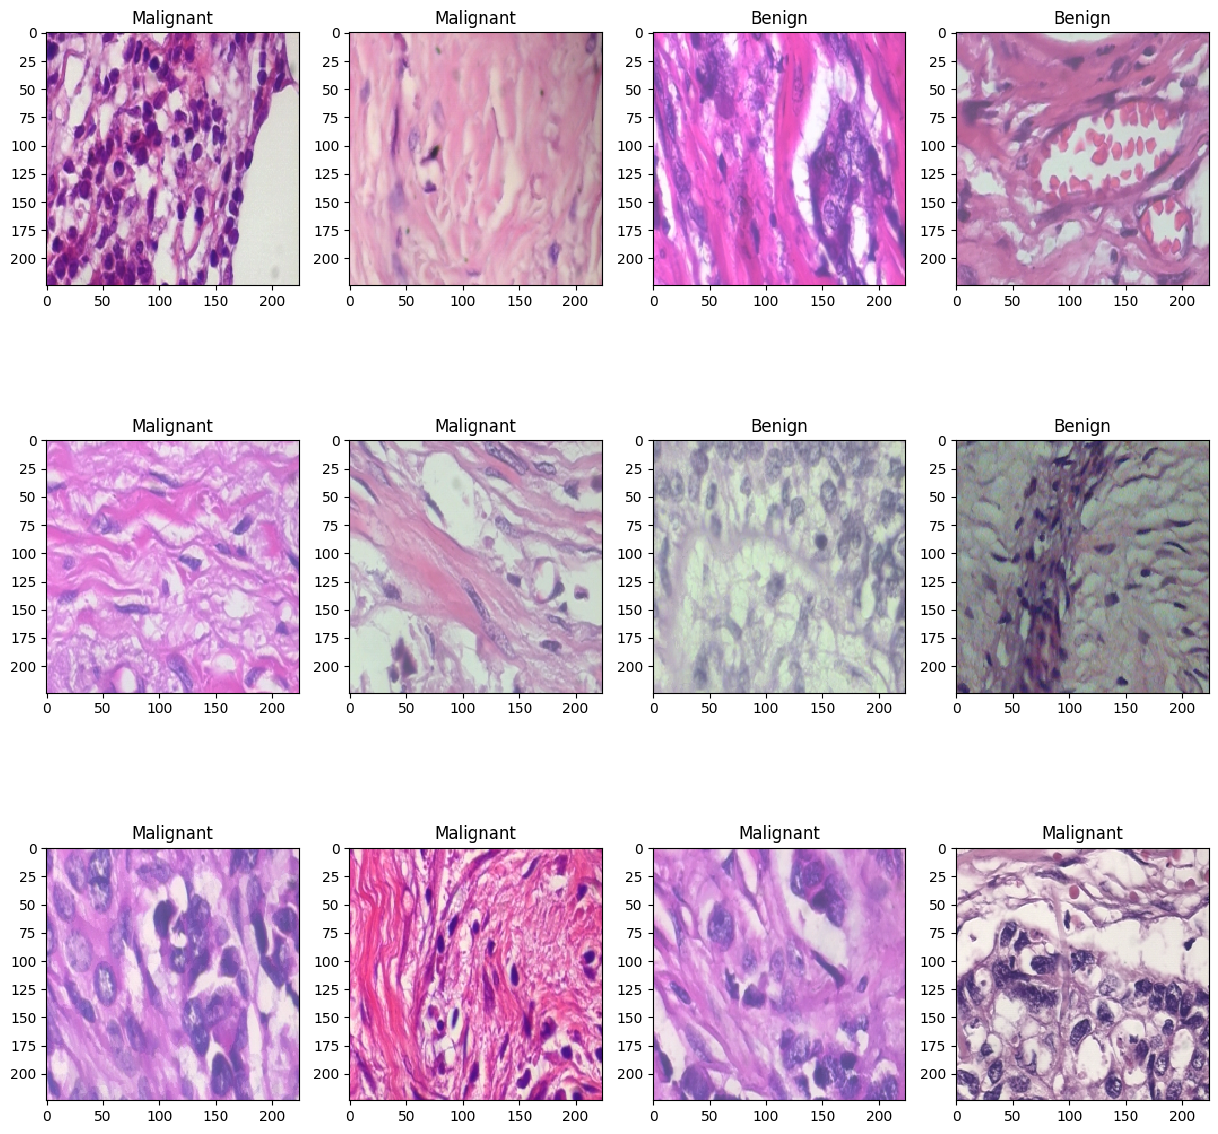

In [13]:
w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if np.argmax(Y_train[i]) == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(x_train[i], interpolation='nearest')



In [14]:
def build_model(backbone):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(2, activation='sigmoid'))


    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )

    return model
K.clear_session()
gc.collect()

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)





model = build_model(resnet)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2)                 3842      
                                                                 
Total params: 18,333,506
Trainable params: 18,100,610
No

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
import numpy as np
from sklearn.metrics import accuracy_score

# ... Your code up to the model definition ...

def learning_rate_scheduler(epoch):
    # Start with a higher learning rate and gradually decrease it during training
    initial_lr = 1e-4
    decay_factor = 0.9
    new_lr = initial_lr * (decay_factor ** epoch)
    return new_lr

# Data Augmentation
train_generator = ImageDataGenerator(
    zoom_range=2,           # Set range for random zoom
    rotation_range=90,       # Set range for random rotation
    horizontal_flip=True,    # Randomly flip images horizontally
    vertical_flip=True       # Randomly flip images vertically
)

# Model Training
BATCH_SIZE = 16
EPOCHS = 50

# Add EarlyStopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model Checkpoint to save the best model during training
filepath = '/content/drive/MyDrive/ModelBreast'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Learning Rate Scheduler callback
lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

# Fit the model
history = model.fit_generator(
    train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping, lr_scheduler]
)

# Load best model weights
model.load_weights(filepath)

# Evaluate the model
Y_val_pred = model.predict(x_val)
accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1))
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))
model.save("/content/drive/MyDrive/ModelBreast/model.h5")


<ipython-input-7-8dce30e11762>:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
57/57 [==============================] - ETA: 0s - loss: 0.5848 - accuracy: 0.7406
Epoch 1: val_accuracy improved from -inf to 0.73043, saving model to /content/drive/MyDrive/ModelBreast


57/57 [==============================] - 296s 3s/step - loss: 0.5848 - accuracy: 0.7406 - val_loss: 0.8171 - val_accuracy: 0.7304 - lr: 1.0000e-04
Epoch 2/50
57/57 [==============================] - ETA: 0s - loss: 0.4754 - accuracy: 0.8126
Epoch 2: val_accuracy improved from 0.73043 to 0.86957, saving model to /content/drive/MyDrive/ModelBreast


57/57 [==============================] - 134s 2s/step - loss: 0.4754 - accuracy: 0.8126 - val_loss: 0.3584 - val_accuracy: 0.8696 - lr: 9.0000e-05
Epoch 3/50
57/57 [==============================] - ETA: 0s - loss: 0.3561 - accuracy: 0.8803
Epoch 3: val_accuracy improved from 0.86957 to 0.90000, saving model to /content/drive/MyDrive/ModelBreast


57/57 [==============================] - 128s 2s/step - loss: 0.3561 - accuracy: 0.8803 - val_loss: 0.2489 - val_accuracy: 0.9000 - lr: 8.1000e-05
Epoch 4/50
57/57 [==============================] - ETA: 0s - loss: 0.3568 - accuracy: 0.8780
Epoch 4: val_accuracy did not improve from 0.90000
57/57 [==============================] - 22s 375ms/step - loss: 0.3568 - accuracy: 0.8780 - val_loss: 0.2893 - val_accuracy: 0.8913 - lr: 7.2900e-05
Epoch 5/50
57/57 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.8636
Epoch 5: val_accuracy improved from 0.90000 to 0.92174, saving model to /content/drive/MyDrive/ModelBreast


57/57 [==============================] - 129s 2s/step - loss: 0.3498 - accuracy: 0.8636 - val_loss: 0.1878 - val_accuracy: 0.9217 - lr: 6.5610e-05
Epoch 6/50
57/57 [==============================] - ETA: 0s - loss: 0.3244 - accuracy: 0.8758
Epoch 6: val_accuracy did not improve from 0.92174
57/57 [==============================] - 21s 357ms/step - loss: 0.3244 - accuracy: 0.8758 - val_loss: 0.2511 - val_accuracy: 0.9087 - lr: 5.9049e-05
Epoch 7/50
57/57 [==============================] - ETA: 0s - loss: 0.2634 - accuracy: 0.9069
Epoch 7: val_accuracy did not improve from 0.92174
57/57 [==============================] - 20s 347ms/step - loss: 0.2634 - accuracy: 0.9069 - val_loss: 0.2179 - val_accuracy: 0.9174 - lr: 5.3144e-05
Epoch 8/50
57/57 [==============================] - ETA: 0s - loss: 0.2713 - accuracy: 0.8947
Epoch 8: val_accuracy did not improve from 0.92174
57/57 [==============================] - 21s 355ms/step - loss: 0.2713 - accuracy: 0.8947 - val_loss: 0.1826 - val_accur

57/57 [==============================] - 127s 2s/step - loss: 0.2620 - accuracy: 0.9091 - val_loss: 0.1680 - val_accuracy: 0.9304 - lr: 4.3047e-05
Epoch 10/50
57/57 [==============================] - ETA: 0s - loss: 0.2271 - accuracy: 0.9102
Epoch 10: val_accuracy did not improve from 0.93043
57/57 [==============================] - 20s 350ms/step - loss: 0.2271 - accuracy: 0.9102 - val_loss: 0.1726 - val_accuracy: 0.9174 - lr: 3.8742e-05
Epoch 11/50
57/57 [==============================] - ETA: 0s - loss: 0.2315 - accuracy: 0.9124
Epoch 11: val_accuracy did not improve from 0.93043
57/57 [==============================] - 19s 337ms/step - loss: 0.2315 - accuracy: 0.9124 - val_loss: 0.2215 - val_accuracy: 0.8913 - lr: 3.4868e-05
Epoch 12/50
57/57 [==============================] - ETA: 0s - loss: 0.2362 - accuracy: 0.9224
Epoch 12: val_accuracy improved from 0.93043 to 0.94783, saving model to /content/drive/MyDrive/ModelBreast


57/57 [==============================] - 128s 2s/step - loss: 0.2362 - accuracy: 0.9224 - val_loss: 0.1401 - val_accuracy: 0.9478 - lr: 3.1381e-05
Epoch 13/50
57/57 [==============================] - ETA: 0s - loss: 0.2357 - accuracy: 0.9124
Epoch 13: val_accuracy did not improve from 0.94783
57/57 [==============================] - 21s 368ms/step - loss: 0.2357 - accuracy: 0.9124 - val_loss: 0.3267 - val_accuracy: 0.9000 - lr: 2.8243e-05
Epoch 14/50
57/57 [==============================] - ETA: 0s - loss: 0.2023 - accuracy: 0.9279
Epoch 14: val_accuracy did not improve from 0.94783
57/57 [==============================] - 19s 333ms/step - loss: 0.2023 - accuracy: 0.9279 - val_loss: 0.1491 - val_accuracy: 0.9478 - lr: 2.5419e-05
Epoch 15/50
57/57 [==============================] - ETA: 0s - loss: 0.2216 - accuracy: 0.9135
Epoch 15: val_accuracy did not improve from 0.94783
57/57 [==============================] - 20s 348ms/step - loss: 0.2216 - accuracy: 0.9135 - val_loss: 0.1452 - val

<Axes: >

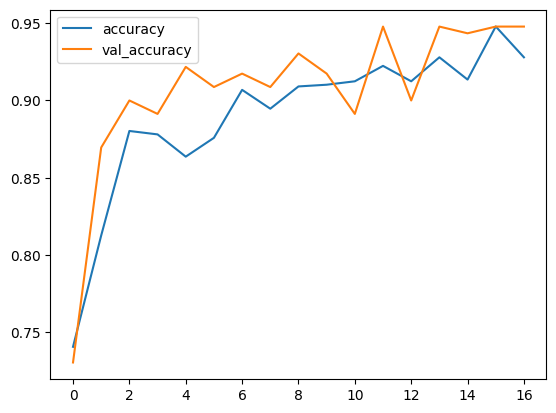

In [15]:
with open('history.json', 'w') as f:
    json.dump(str(history.history), f)
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()